In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.DataFrame([{'Age': 31,'Height': 1.72,'Salary': 31000,'Weight': 74,'Years_school': 16},
              {'Age': 30,'Height': 1.74,'Salary': 28000,'Weight': 76,'Years_school': 16},
              {'Age': 54, 'Height': 2.1, 'Salary': 33000, 'Weight': 98, 'Years_school': 12},
              {'Age': 56, 'Height': 1.7, 'Salary': 28000, 'Weight': 61, 'Years_school': 12},
              {'Age': 56,'Height': 1.65,'Salary': 39000,'Weight': 59,'Years_school': 15},
              {'Age': 32,'Height': 1.87,'Salary': 39000,'Weight': 85,'Years_school': 18},
              {'Age': 23,'Height': 1.95,'Salary': 37000,'Weight': 88,'Years_school': 18},
              {'Age': 58,'Height': 2.04,'Salary': 36000,'Weight': 96,'Years_school': 12},
              {'Age': 39,'Height': 1.88,'Salary': 35000,'Weight': 76,'Years_school': 16},
              {'Age': 56, 'Height': 1.73, 'Salary': 17000, 'Weight': 63, 'Years_school': 9},
              {'Age': 39,'Height': 1.61,'Salary': 36000,'Weight': 55,'Years_school': 18},
              {'Age': 28, 'Height': 1.7, 'Salary': 40000, 'Weight': 68, 'Years_school': 21},
              {'Age': 56, 'Height': 1.64, 'Salary': 19000, 'Weight': 54, 'Years_school': 9},
              {'Age': 49,'Height': 1.67,'Salary': 34000,'Weight': 65,'Years_school': 15},
              {'Age': 32,'Height': 1.62,'Salary': 26000,'Weight': 64,'Years_school': 12},
              {'Age': 28,'Height': 1.92,'Salary': 31000,'Weight': 80,'Years_school': 16},
              {'Age': 50,'Height': 2.07,'Salary': 33000,'Weight': 84,'Years_school': 12},
              {'Age': 29,'Height': 1.96,'Salary': 33000,'Weight': 77,'Years_school': 16},
              {'Age': 29,'Height': 1.64,'Salary': 28000,'Weight': 56,'Years_school': 12}])
data.head()

,Age,Height,Salary,Weight,Years_school
0,31,1.72,31000,74,16
1,30,1.74,28000,76,16
2,54,2.10,33000,98,12
3,56,1.70,28000,61,12
4,56,1.65,39000,59,15


# Skewness

Age             0.192668
Height          0.559545
Salary         -0.977210
Weight          0.359448
Years_school    0.016048
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


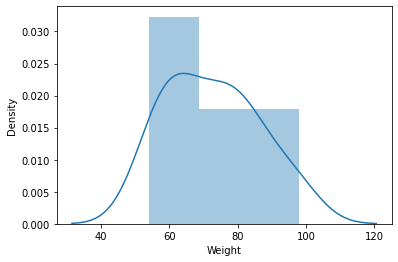

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


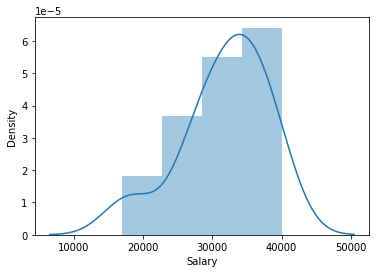

In [ ]:
display(data.skew())

sns.distplot(data['Weight']) # positive skwed - value is bigger that zero
plt.show()
sns.distplot(data['Salary']) # positive skwed - value is smaller that zero
plt.show()



# Normalization and Standardization

## Normalization

In [ ]:
data.head()

# between line 1 and 2, who is "more similar" to the individual in row 0?
#1

,Age,Height,Salary,Weight,Years_school
0,31,1.72,31000,74,16
1,30,1.74,28000,76,16
2,54,2.10,33000,98,12
3,56,1.70,28000,61,12
4,56,1.65,39000,59,15


In [ ]:
# We can calculate similarity based on distance
# let's define the "distance" between individuals using the euclidean distance
def euclidean_d(row1,row2):
  distance_squared = (row1['Age']-row2['Age'])**2 + (row1['Height']-row2['Height'])**2 + (row1['Salary']-row2['Salary'])**2 + (row1['Weight']-row2['Weight'])**2 + (row1['Years_school']-row2['Years_school'])**2 
  return np.sqrt(distance_squared)

In [ ]:
#and compute d(ind0,ind1) 
print(euclidean_d(data.iloc[0],data.iloc[1]))
#and d(ind0,ind2)
print(euclidean_d(data.iloc[0],data.iloc[2]))
#so individual 0 is closer to individual 2, right?
#what happened? 

3000.000833399884
2000.2802664626774


In [ ]:
#we will put each column in the same referential [0,1]:

In [ ]:
yr_shcl_max = data['Years_school'].max()
yr_shcl_min = data['Years_school'].min()
data['Years_school_n'] = (data['Years_school']-yr_shcl_min)/(yr_shcl_max-yr_shcl_min)
data.head()

,Age,Height,Salary,Weight,Years_school,Years_school_n
0,31,1.72,31000,74,16,0.583333
1,30,1.74,28000,76,16,0.583333
2,54,2.10,33000,98,12,0.250000
3,56,1.70,28000,61,12,0.250000
4,56,1.65,39000,59,15,0.500000


In [ ]:
# we will do the same for all the columns 

data = data.drop(columns=['Years_school_n'])
for col in data.columns:
  col_max = data[col].max()
  col_min = data[col].min()
  data[col+"_n"] = (data[col]-col_min)/(col_max-col_min)
data.head()

,Age,Height,Salary,Weight,Years_school,Age_n,Height_n,Salary_n,Weight_n,Years_school_n
0,31,1.72,31000,74,16,0.228571,0.224490,0.608696,0.454545,0.583333
1,30,1.74,28000,76,16,0.200000,0.265306,0.478261,0.500000,0.583333
2,54,2.10,33000,98,12,0.885714,1.000000,0.695652,1.000000,0.250000
3,56,1.70,28000,61,12,0.942857,0.183673,0.478261,0.159091,0.250000
4,56,1.65,39000,59,15,0.942857,0.081633,0.956522,0.113636,0.500000


In [ ]:
#now we again do our distance comparison, but in the normalized columns
def euclidean_dn(row1,row2):
  distance_squared = (row1['Age_n']-row2['Age_n'])**2 + (row1['Height_n']-row2['Height_n'])**2 + (row1['Salary_n']-row2['Salary_n'])**2 + (row1['Weight_n']-row2['Weight_n'])**2 + (row1['Years_school_n']-row2['Years_school_n'])**2 
  return np.sqrt(distance_squared)

In [ ]:
#and compute dn(ind0,ind1) 
print(euclidean_dn(data.iloc[0],data.iloc[1]))
#and dn(ind0,ind2)
print(euclidean_dn(data.iloc[0],data.iloc[2]))
#so individual 0 is much closer to individual 1 than to individual 2

0.14683884792085114
1.2039294083415844


In [ ]:
#there are pre made functions for this
#sklearn, short for scikit-learn is a very popular machine learning library. We will use it quite a bit
import sklearn
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalizer.fit_transform(data[['Age','Height','Salary','Weight','Years_school']])


array([[0.22857143, 0.2244898 , 0.60869565, 0.45454545, 0.58333333],
       [0.2       , 0.26530612, 0.47826087, 0.5       , 0.58333333],
       [0.88571429, 1.        , 0.69565217, 1.        , 0.25      ],
       [0.94285714, 0.18367347, 0.47826087, 0.15909091, 0.25      ],
       [0.94285714, 0.08163265, 0.95652174, 0.11363636, 0.5       ],
       [0.25714286, 0.53061224, 0.95652174, 0.70454545, 0.75      ],
       [0.        , 0.69387755, 0.86956522, 0.77272727, 0.75      ],
       [1.        , 0.87755102, 0.82608696, 0.95454545, 0.25      ],
       [0.45714286, 0.55102041, 0.7826087 , 0.5       , 0.58333333],
       [0.94285714, 0.24489796, 0.        , 0.20454545, 0.        ],
       [0.45714286, 0.        , 0.82608696, 0.02272727, 0.75      ],
       [0.14285714, 0.18367347, 1.        , 0.31818182, 1.        ],
       [0.94285714, 0.06122449, 0.08695652, 0.        , 0.        ],
       [0.74285714, 0.12244898, 0.73913043, 0.25      , 0.5       ],
       [0.25714286, 0.02040816, 0.

## Standardization

In [ ]:
data = pd.DataFrame({'Grade': {0: 13,1: 13,2: 8,3: 14,4: 20,5: 20,6: 13,7: 17,8: 8,9: 1,10: 9,11: 16,12: 15,13: 19,14: 0,15: 16,16: 14,17: 19,18: 1},
              'Minutes_spent': {0: 233,1: 228,2: 231,3: 229,4: 233,5: 233,6: 225,7: 228,8: 234,9: 12,10: 231,11: 235,12: 239,13: 234,14: 6,15: 233,16: 227,17: 236,18: 18}})
data.head()

,Grade,Minutes_spent
0,13,233
1,13,228
2,8,231
3,14,229
4,20,233


In [ ]:
# let's normalize
columns = data.columns
for col in columns:
  col_max = data[col].max()
  col_min = data[col].min()
  data[col+"_n"] = (data[col]-col_min)/(col_max-col_min)
data.head()

,Grade,Minutes_spent,Grade_n,Minutes_spent_n
0,13,233,0.65,0.974249
1,13,228,0.65,0.952790
2,8,231,0.40,0.965665
3,14,229,0.70,0.957082
4,20,233,1.00,0.974249


In [ ]:
#wow, it seems like we have a lot of very extreme minutes_spent values!
data['Minutes_spent']

0     233
1     228
2     231
3     229
4     233
5     233
6     225
7     228
8     234
9      12
10    231
11    235
12    239
13    234
14      6
15    233
16    227
17    236
18     18
Name: Minutes_spent, dtype: int64

In [ ]:
#oh, those values are not extreme at all, in fact they are pretty "central"
#data standardization to the rescue

In [ ]:
# let's stndardize
for col in columns:
  col_mean = data[col].mean()
  col_std = data[col].std()
  data[col+"_s"] = (data[col]-col_mean)/(col_std)
data

,Grade,Minutes_spent,Grade_n,Minutes_spent_n,Grade_s,Minutes_spent_s
0,13,233,0.65,0.974249,0.091121,0.435395
1,13,228,0.65,0.952790,0.091121,0.374746
2,8,231,0.40,0.965665,-0.695833,0.411135
3,14,229,0.70,0.957082,0.248512,0.386876
4,20,233,1.00,0.974249,1.192856,0.435395
5,20,233,1.00,0.974249,1.192856,0.435395
6,13,225,0.65,0.939914,0.091121,0.338357
7,17,228,0.85,0.952790,0.720684,0.374746
8,8,234,0.40,0.978541,-0.695833,0.447524
9,1,12,0.05,0.025751,-1.797568,-2.245283


In [ ]:
#there are pre made functions for this
import sklearn
from sklearn.preprocessing import StandardScaler

StandardScaler().fit_transform(data[['Grade','Minutes_spent']])

array([[ 0.09361787,  0.44732556],
       [ 0.09361787,  0.38501481],
       [-0.71490009,  0.42240126],
       [ 0.25532146,  0.39747696],
       [ 1.22554301,  0.44732556],
       [ 1.22554301,  0.44732556],
       [ 0.09361787,  0.34762836],
       [ 0.74043224,  0.38501481],
       [-0.71490009,  0.4597877 ],
       [-1.84682523, -2.30680935],
       [-0.5531965 ,  0.42240126],
       [ 0.57872864,  0.47224985],
       [ 0.41702505,  0.52209845],
       [ 1.06383942,  0.4597877 ],
       [-2.00852882, -2.38158225],
       [ 0.57872864,  0.44732556],
       [ 0.25532146,  0.37255266],
       [ 1.06383942,  0.484712  ],
       [-1.84682523, -2.23203646]])

# Covariance and correlation

###Extra
We don't care about covariance, like we don't care about variance.
We care about correlation the same way we care for standard deviation.

- You can check this part, but not crutial for the curriculum. It's an extra for you.
- You will see here some other methods that you could use in the future:
 - np.random.normal()
 - plt.vlines()
 - np.cov()
 - np.corrcoef()
 - stats.normaltest()

The median of my random generated normal distribution is 1.6381928128799252
The mean of my random generated normal distribution is 1.6799599842220845


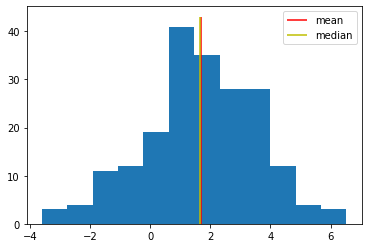

The null hypothesis cannot be rejected, data_1 doesn't come from a normal distribution


In [ ]:
# Covariance and correlation
import numpy as np
from scipy import stats

##location and spread to create my data using np.random.normal
## they are not exat the mean and the standard deviation because we are using the random funciton

location = 1
scale= 2

data_1 = np.random.normal(loc = mean, scale = scale, size = 200) # np.random.normal creates a certain number of random numbers that follows a normal distribution with a certain location/ where I center my dist. (loc), and a certain dispertion (scale)
data_2 = np.random.normal(loc = mean, scale = scale, size = 200)
#display(data_1)

##median based on my data
median = np.median(data_1)
print('The median of my random generated normal distribution is', median)
mean = np.mean(data_1)
print('The mean of my random generated normal distribution is', mean)

##vizualise data_1
plt.hist(data_1, bins=12) # here you can see that the data follows aproximatly a normal distribution, if you increase the number of values you will see that it will become a more perfect curve

##For the visualization
axes = plt.gca() # get min and max value for the y axis depending on your data
y_min, y_max = axes.get_ylim() # save it in two variables

plt.vlines(x=mean, ymin=y_min, ymax=y_max, colors='r',  label='mean') #plot a line that represents the mean
plt.vlines(x=median, ymin=y_min, ymax=y_max, colors='y', label='median') # #plot a line that represents the median
plt.legend() # for showing the legend
plt.show()

#You can see that every time you run this cell the median and the mean are always very similar (almost symetrical and unimodal - what defines a normal distribution)


#----------------------- END ----------------------- #
#--------------------- DANGER! --------------------- #


## NOTE: BELLOW IS SOMETHING WE WILL ONLY SEE IN THE FUTURE WITH THE INFERENTIAL STATISTICS ##
##I JUST PUT IT OUT HERE IN ORDER TO PROVE THAT MY DISTRIBUTION ABOVE FOLLOWS A NORMAL DISTRIBUTION ##
## AS I WAS BUILDING THE SCRIPT I ENDED UP GOING AN EXTRA MILE AND I COULDN"T DELETE IT (SORRY) ##
## YOU CAN SKIP IT !! ##

#--------------------- DANGER! --------------------- #

#testing for normality 

#normaltest 
# H0(null hypothesis): data_1 comes from a normal distribution
# H1(alternative hypothesis): data_1 doesn't comes from a normal distribution

alpha = 0.001 #significance level
stat, p_value = stats.normaltest(data_1)

if p_value < alpha:
  print("The null hypothesis can be rejected, data_1 comes from a normal distribution")
else:
  print("The null hypothesis cannot be rejected, data_1 doesn't come from a normal distribution")

In [ ]:
# calculating the covariance between both array
display(data_1)
display(data_2)

print('\n')
np.cov(data_1,data_2)

#np.cov returns a matrix of covariances, how do I interpret this?
                                    
#[ cov data_ 1 with data_1 == variance data_1            ,        cov data_1 with data_2]
#[cov data_2 with data_1          ,            cov data_2 with data_2 == variance data_2]


array([ 0.74406904,  2.71175316,  3.82890145,  3.82952986,  2.86805781,
       -0.68889317,  2.79788429,  4.10161877,  1.19338722,  3.66514739,
        0.78862109,  1.04557673,  1.16337271,  1.55746045,  3.24583806,
       -2.71606614,  1.99504222,  1.78025123,  0.33109415,  1.40625352,
        1.62695646, -1.09557462, -1.55091488,  1.3316895 ,  1.07982058,
        1.26049677,  2.88887352,  2.38542682,  3.1928997 , -0.30914249,
        3.6303591 , -0.13070537,  3.36526626,  0.67397961,  3.56321235,
        3.91036116,  3.33587281,  1.06269018, -1.3593392 , -0.05748148,
       -0.26577214,  2.62618223, -0.97809724,  3.09066755,  4.37618461,
        1.20091723,  1.27475028, -3.16454489,  2.14169975,  2.25077509,
        1.57811793,  3.12163978, -1.95203472,  0.8704679 ,  4.51687901,
        3.12239003,  3.68328624,  2.2745889 ,  0.53651469,  3.30487947,
        3.82652405,  2.01152414,  5.26303359,  0.29151284, -1.51843768,
        0.04989935, -0.22773836,  1.77895459,  2.1196589 ,  1.86

array([ 0.95962477,  0.42782058, -0.83687055,  1.73658004, -1.76674829,
        5.00396247,  0.59777721,  0.84393064,  4.91769285,  2.18248184,
        3.71648404,  1.57110543,  2.74397569,  0.08893776,  4.17235133,
        3.09237359,  0.74729667,  1.31941093, -0.0665805 ,  2.11960618,
        7.06499185, -0.61741451,  1.71222244, -0.52761638, -1.62826007,
        0.44280973, -0.59360057,  4.74945372,  1.33360398,  3.85093185,
        2.29566292, -2.00637776, -2.49675497,  3.41662379,  3.46442738,
        2.41130789,  3.68841914,  2.34982404,  4.78491755, -1.80311123,
       -1.10374821,  0.19688501,  1.85324189,  3.14149967, -0.21608025,
        3.2214051 ,  2.33543912,  3.57786508, -2.19973974,  5.75503573,
        0.51877713,  1.75307264,  2.17400585,  1.72509116, -1.54225854,
        2.52117577,  0.58026985,  3.20399859,  3.58125014,  1.61172763,
       -0.72520807,  3.69114555, -0.63073893,  6.17834574, -1.26344527,
        2.94051995,  4.86122722,  3.36226612,  3.67980606,  0.77

array([[ 3.59059835, -0.54437466],
       [-0.54437466,  4.67558269]])

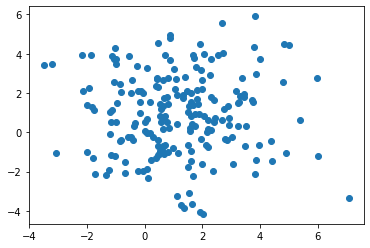

In [ ]:
plt.scatter(data_1,data_2)
plt.show()

In [ ]:
#If i force data_3 to be correlated to data_1 by centering each datapoint from the corresponding one in data_1
data_3 = data_1 + np.random.normal(loc = 0, scale = 2, size = 200)

np.cov(data_1,data_3)

array([[3.35706394, 3.44291637],
       [3.44291637, 7.77460169]])

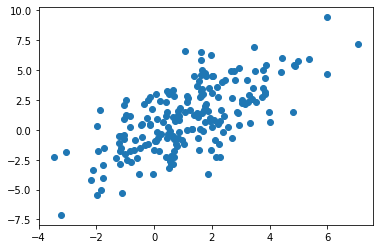

In [ ]:
plt.scatter(data_1,data_3)
plt.show()

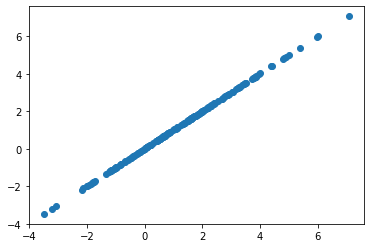

In [ ]:
plt.scatter(data_1,data_1)
plt.show()

In [ ]:
# let's calculate the correlation using numpy
# this command returns pearson correlation only
np.corrcoef(data_1,data_2)

# [ corr data_1 with itself   ,   corr data_1 with data_2]
# [ corr data_2 with data_1   ,   corr data_2 with itself]

array([[ 1.        , -0.00909674],
       [-0.00909674,  1.        ]])

In [ ]:
np.corrcoef(data_1,data_3)

array([[1.        , 0.67391883],
       [0.67391883, 1.        ]])

#Correlation (Restar of what is important)

In [ ]:
data = pd.DataFrame({'Grade': {0: 13,1: 13,2: 8,3: 14,4: 20,5: 20,6: 13,7: 17,8: 8,9: 1,10: 9,11: 16,12: 15,13: 19,14: 0,15: 16,16: 14,17: 19,18: 1},
              'Minutes_spent': {0: 233,1: 228,2: 231,3: 229,4: 233,5: 233,6: 225,7: 228,8: 234,9: 12,10: 231,11: 235,12: 239,13: 234,14: 6,15: 233,16: 227,17: 236,18: 18}})
data.head()

,Grade,Minutes_spent
0,13,233
1,13,228
2,8,231
3,14,229
4,20,233


In [ ]:
# Linear relationship(Pearson) - magnitud of the values vs monothonic relationship (Spearman) - order of indexes
display(data['Minutes_spent'])
display(data['Grade'])

print('\n\n')
#monothonic relationship (Spearman)
display(data['Minutes_spent'].sort_values())
display(data['Grade'].sort_values())

0     233
1     228
2     231
3     229
4     233
5     233
6     225
7     228
8     234
9      12
10    231
11    235
12    239
13    234
14      6
15    233
16    227
17    236
18     18
Name: Minutes_spent, dtype: int64

0     13
1     13
2      8
3     14
4     20
5     20
6     13
7     17
8      8
9      1
10     9
11    16
12    15
13    19
14     0
15    16
16    14
17    19
18     1
Name: Grade, dtype: int64

14      6
9      12
18     18
6     225
16    227
7     228
1     228
3     229
10    231
2     231
4     233
5     233
15    233
0     233
8     234
13    234
11    235
17    236
12    239
Name: Minutes_spent, dtype: int64

14     0
9      1
18     1
8      8
2      8
10     9
6     13
1     13
0     13
3     14
16    14
12    15
11    16
15    16
7     17
17    19
13    19
4     20
5     20
Name: Grade, dtype: int64

[0 1 2 3 4 5 6 7 8 9]
[1.88237906e+00 5.46619868e+00 1.01291644e+01 3.02082542e+01
 5.51582423e+01 1.51032052e+02 4.07648738e+02 1.08579097e+03
 2.97979987e+03 8.09726328e+03]
Pearson correlation:  0.7164651473550108
Spearman correlation:  SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64)
kendall tau correlation:  KendalltauResult(correlation=0.9999999999999999, pvalue=5.511463844797178e-07)


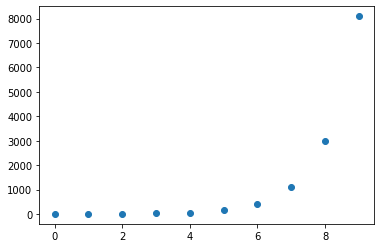

In [ ]:
from scipy import stats
# spearman correlation example -> good correlations
x = np.arange(0,10,1)

# try running the cells below with these combinations
#y = np.square(x) + np.random.normal(loc = 0, scale = 5, size = 10)
y = np.exp(x) + np.random.normal(loc = 0, scale = 5, size = 10)


# spearman correlation example -> bad correlations
#x = np.arange(-10,10,1)

# try running the cells below with these combinations
#y = np.square(x) + np.random.normal(loc = 0, scale = 5, size = 20)
#y = np.exp(x) + np.random.normal(loc = 0, scale = 5, size = 20)


print(x)
print(y)
# pearson 
print("Pearson correlation: ",stats.pearsonr(x,y)[0])
# spearman
print("Spearman correlation: ", stats.spearmanr(x,y))
# kendall tau
print("kendall tau correlation: ", stats.kendalltau(x,y))
plt.scatter(x,y)
plt.show()